# This notebook gives an idea of effective visualization with Matplotlib   

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
Canada_df = pd.read_excel('Canada.xlsx', skiprows=range(20), sheet_name='Canada by Citizenship',skipfooter=2)
print (Canada_df.head(3))
print ("Shape of Data-Frame:",  Canada_df.shape,)
print ('\n')
print ("Check Null values:",  Canada_df.isnull().values.any())

         Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Immigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Immigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   

   DEV             DevName  1980  ...  2004  2005  2006  2007  2008  2009  \
0  902  Developing regions    16  ...  2978  3436  3009  2652  2111  1746   
1  901   Developed regions     1  ...  1450  1223   856   702   560   716   
2  902  Developing regions    80  ...  3616  3626  4807  3623  4005  5393   

   2010  2011  2012  2013  
0  1758  2203  2635  2004  
1   561   539   620   603  
2  4752  4325  3774  4331  

[3 rows x 43 columns]
Shape of Data-Frame: (195, 43)


Check Null values: False


## Drop the Useless Columns 

In [5]:
Canada_df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName'], axis=1, inplace=True)
Canada_df.tail(3)

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Yemen,Asia,Western Asia,1,2,1,6,0,18,7,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,11,17,11,7,16,9,15,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,Eastern Africa,72,114,102,44,32,29,43,...,1450,615,454,663,611,508,494,434,437,407


In [19]:
Canada_df.rename(columns={'OdName':'Country_Name', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
Canada_df.tail(3)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country_Name,,,,,,,,,,,,,,,,,,,,,
Yemen,Asia,Western Asia,1,2,1,6,0,18,7,12,...,124,161,140,122,133,128,211,160,174,217
Zambia,Africa,Eastern Africa,11,17,11,7,16,9,15,23,...,56,91,77,71,64,60,102,69,46,59
Zimbabwe,Africa,Eastern Africa,72,114,102,44,32,29,43,68,...,1450,615,454,663,611,508,494,434,437,407


In [20]:
 # show the data types in each column 
Canada_df.columns


Index(['Continent', 'Region', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [21]:
Canada_df.dtypes

Continent    object
Region       object
1980          int64
1981          int64
1982          int64
1983          int64
1984          int64
1985          int64
1986          int64
1987          int64
1988          int64
1989          int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
dtype: object

### convert all the column names as strings i.e. treat the years as strings

In [22]:
#print (type(Canada_df.columns))
Canada_df.columns = list(map(str, Canada_df.columns))
for i in range(len(Canada_df.columns)):
    print(type(Canada_df.columns[i])) # 

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


#### Instead of row numbers we want country_name as index

In [23]:
Canada_df_world_map =  Canada_df.copy()
Canada_df_world_map.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


In [25]:
#Canada_df.set_index('Country_Name', inplace=True)
Canada_df.tail(3)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country_Name,,,,,,,,,,,,,,,,,,,,,
Yemen,Asia,Western Asia,1,2,1,6,0,18,7,12,...,124,161,140,122,133,128,211,160,174,217
Zambia,Africa,Eastern Africa,11,17,11,7,16,9,15,23,...,56,91,77,71,64,60,102,69,46,59
Zimbabwe,Africa,Eastern Africa,72,114,102,44,32,29,43,68,...,1450,615,454,663,611,508,494,434,437,407


#### Add a column that consist of the sum of all the immigrants over the year for each country

In [26]:
Canada_df['Total_Immigrants'] = Canada_df.sum(axis=1)
Canada_df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_Immigrants
Country_Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699


#### Our main is to play with the years i.e. range(1980, 2014) and first we create a list of years 

In [27]:
all_years = list(map(str, range(1980, 2014)))

In [28]:
Canada_df_haiti = Canada_df.loc[['Haiti'], all_years]

In [29]:
#Canada_df_haiti.head(5)
Canada_df_haiti = Canada_df_haiti.transpose()
Canada_df_haiti.tail()

Country_Name,Haiti
2009,2080
2010,4744
2011,6503
2012,5868
2013,4152


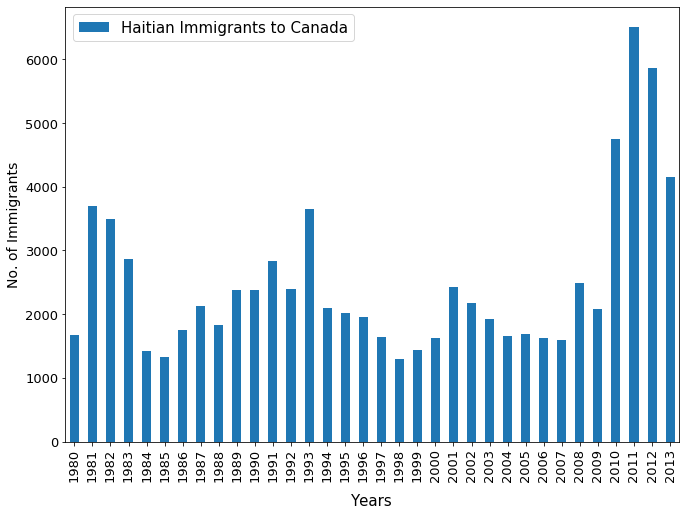

In [30]:
Canada_df_haiti.plot(kind='bar', figsize=(11,8), legend=False, logy=False, fontsize=13)
plt.xlabel('Years', fontsize=15, labelpad=12)
plt.ylabel('No. of Immigrants', fontsize=14)
label = ['Haitian Immigrants to Canada']
plt.legend(label, fontsize=15)

####  2010 *Haiti Earthquake*  death toll around 150,000, annotate plot  

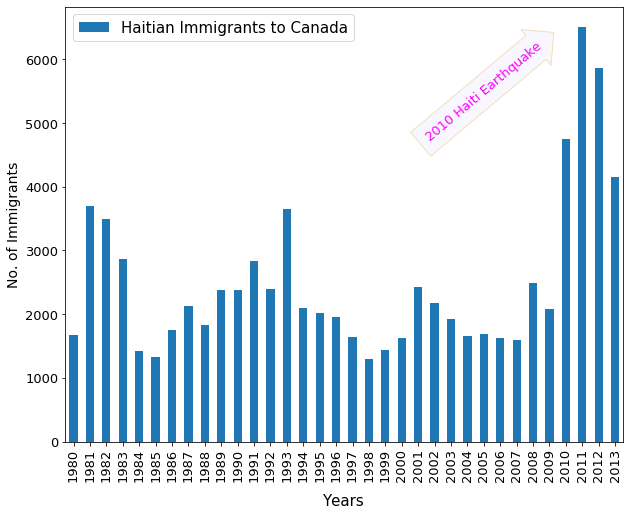

In [31]:
Canada_df_haiti.plot(kind='bar', figsize=(10,8), legend=False, logy=False, fontsize=13)
plt.xlabel('Years', fontsize=15, labelpad=12)
plt.ylabel('No. of Immigrants', fontsize=14)
label = ['Haitian Immigrants to Canada']
plt.legend(label, fontsize=15)
#plt.xlim(-1,34.2)
#plt.ylim(0, 6500)
bbox_props = dict(boxstyle="rarrow,pad=0.7", fc="lavender", ec="goldenrod", lw=1,alpha=0.3)
t = plt.text(25, 5500, "2010 Haiti Earthquake", ha="center", va="center", rotation=40, bbox=bbox_props, fontsize=13, color='magenta')
bb = t.get_bbox_patch()

#### Very Similar Plots scan be shown for Immigration from _Iceland_

In [32]:
Canada_df_Iceland = Canada_df.loc[['Iceland'], all_years]
Canada_df_Iceland = Canada_df_Iceland.transpose()
print (Canada_df_Iceland.tail(3))

Country_Name  Iceland
2011               38
2012               42
2013               72


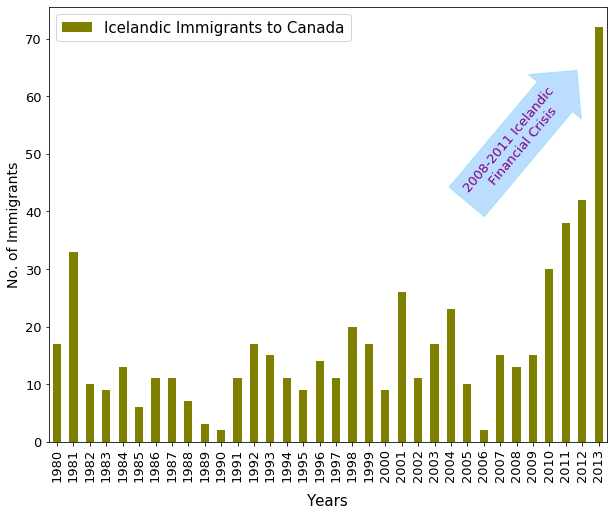

In [33]:
Canada_df_Iceland.plot(kind='bar', figsize=(10,8), legend=False, logy=False, fontsize=13, color='olive')
plt.xlabel('Years', fontsize=15, labelpad=12)
plt.ylabel('No. of Immigrants', fontsize=14)
label = ['Icelandic Immigrants to Canada']
plt.legend(label, fontsize=15)
bbox_props = dict(boxstyle="rarrow,pad=0.7", fc="Dodgerblue", ec="Turquoise", lw=1,alpha=0.3)
t = plt.text(28, 52, "2008-2011 Icelandic \n Financial Crisis", ha="center", va="center", rotation=50, bbox=bbox_props, fontsize=13, color='purple')
bb = t.get_bbox_patch()

### Let's plot _pie_ chart for the continents

In [34]:
print (Canada_df['Continent'].value_counts())

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64


#### groupby the dataframe according to continents

In [35]:
Canada_df_Continents = Canada_df.groupby('Continent', axis=0).sum()
print (Canada_df_Continents.tail(3))

                                  1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   
Oceania                           1942   1839   1675   1018    878    920   

                                  1986   1987   1988   1989  ...   2005  \
Continent                                                    ...          
Latin America and the Caribbean  21179  28471  21924  25060  ...  24747   
Northern America                  7074   7705   6469   6790  ...   8394   
Oceania                            904   1200   1181   1539  ...   1585   

                                  2006   2007   2008   2009   2010   2011  \
Continent                                                                   
Latin America and the Caribbean  24676  26011  26547  26867  28818  27856   
Norther

### Make 2 fantastic pie plots if total no number of immigrants from  different continents in 1985, 2005
#### First select the dataframes with .loc function

In [36]:
Canada_df_Continents_2005 = Canada_df_Continents.loc[:, ['2005']]
Canada_df_Continents_2005.sort_values(['2005'], inplace=True)
print (Canada_df_Continents_2005.tail(6))
Canada_df_Continents_1985 = Canada_df_Continents.loc[:, ['1985']]
Canada_df_Continents_1985.sort_values(['1985'], inplace=True)
print (Canada_df_Continents_1985.tail(3))

                                   2005
Continent                              
Oceania                            1585
Northern America                   8394
Latin America and the Caribbean   24747
Africa                            27523
Europe                            35955
Asia                             159253
                                  1985
Continent                             
Latin America and the Caribbean  15171
Europe                           20844
Asia                             23850


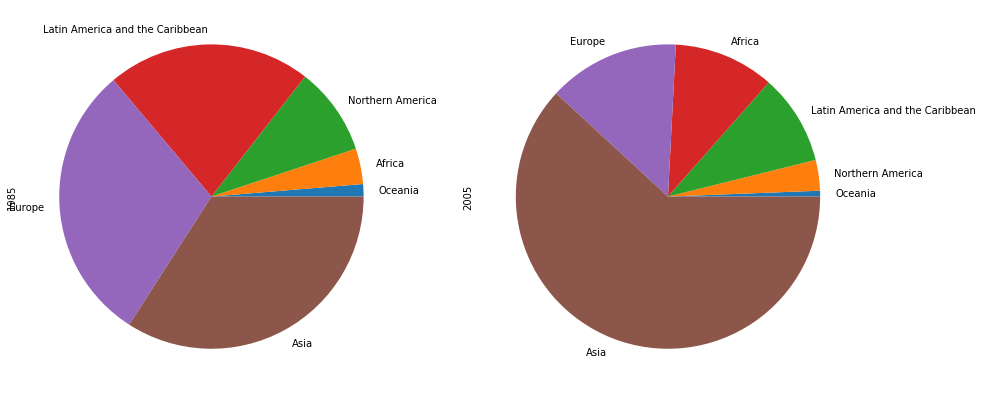

In [37]:
fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
Canada_df_Continents_1985['1985'].plot(kind='pie')
plt.subplot(1,2,2)
Canada_df_Continents_2005['2005'].plot(kind='pie')

#### Make full use of all the function in plot to make the plot look super cool 

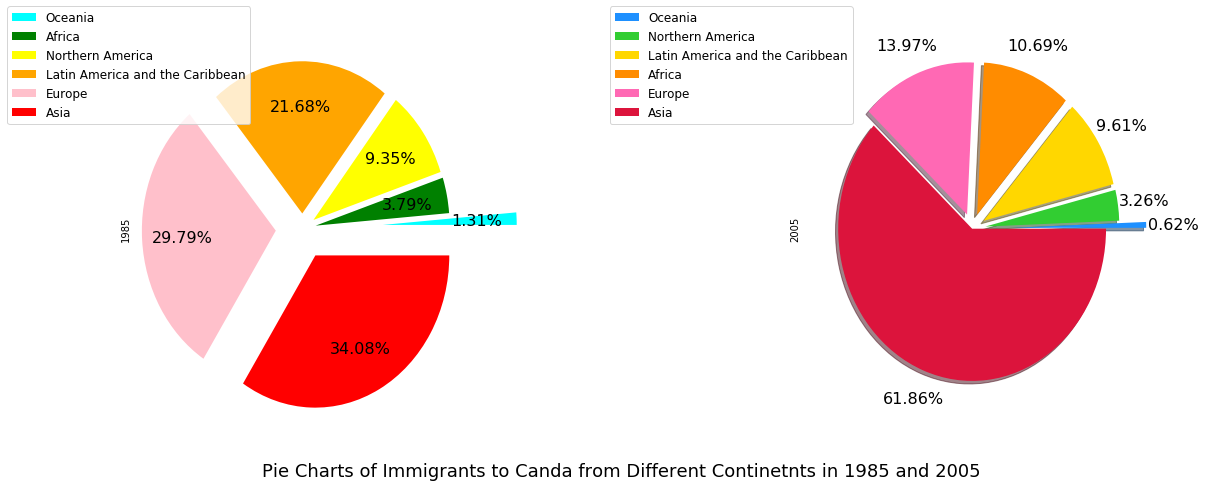

In [432]:
fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
explode_list_1985 = [0.6,0.1,0.1,0.1,0.2,0.2]
colors_list_1985 = ['aqua', 'green', 'yellow', 'orange', 'Pink', 'Red']
Canada_df_Continents_1985['1985'].plot(kind='pie', explode = explode_list_1985, fontsize=16, autopct='%1.2f%%', 
                                       pctdistance=0.7, labels=None, colors=colors_list_1985)
labels_1985 = Canada_df_Continents_1985.index
plt.legend(labels_1985, loc='upper left', fontsize=12, bbox_to_anchor=(-0.4,1.1))
plt.subplot(1,2,2)
explode_list_2005 = [0.3,0.1,0.1,0.1,0.1,0.0]
colors_list_2005 = ['dodgerblue', 'limegreen', 'gold', 'darkorange', 'Hotpink', 'crimson']
Canada_df_Continents_2005['2005'].plot(kind='pie', explode = explode_list_2005, fontsize=16, autopct='%1.2f%%', 
                                       pctdistance=1.2, labels=None, colors=colors_list_2005, shadow=True)
labels_2005 = Canada_df_Continents_2005.index
plt.legend(labels_2005, loc='upper left', fontsize=12, bbox_to_anchor=(-0.6,1.1))
fig.subplots_adjust(wspace=1)
plt.suptitle("Pie Charts of Immigrants to Canda from Different Continetnts in 1985 and 2005", 
             fontsize = 18, y=0.04)
#plt.savefig("Pie_Imm_to_Canda_Cont_1985_2005.png", dpi=700)
plt.show()

### Did you see how the percentage is varying in a space of 20 years ? 

### Finally we will plot some bubble plots, a special type of scatter plots  

#### First we select only China and India as two countries and  <br> then plot the immigration trend from 1980 to 2013 

In [38]:
Canada_df_years = Canada_df.drop(['Continent', 'Region', 'Total_Immigrants'], axis=1).transpose()
Canada_df_years= Canada_df_years.reset_index()
Canada_df_years.rename(columns={'index':'Years'}, inplace=True)
#print (Canada_df_years.tail(3))
#Canada_df_Chi_Ind = Canada_df.loc[['China', 'India'], all_years].transpose()
#Canada_df_Chi_Ind.tail(3)
Canada_df_Chi_Ind = Canada_df_years.loc[:,['Years', 'China', 'India']]
print (Canada_df_Chi_Ind.tail(3))
#print (Canada_df_Chi_Ind.dtypes)
# change the variable types in Years column
Canada_df_Chi_Ind = Canada_df_Chi_Ind.astype({"Years":int})
print (Canada_df_Chi_Ind.dtypes)

Country_Name Years  China  India
31            2011  28502  27509
32            2012  33024  30933
33            2013  34129  33087
Country_Name
Years    int32
China    int64
India    int64
dtype: object


#### We are ready to plot after creating a mini dataframe and resetting the index

Minimum immigrants from India:  4211
Minimum immigrants from China  1527


Text(0.5, 1.0, 'Immigrnats from China and India to Canada over the years 1980-2013')

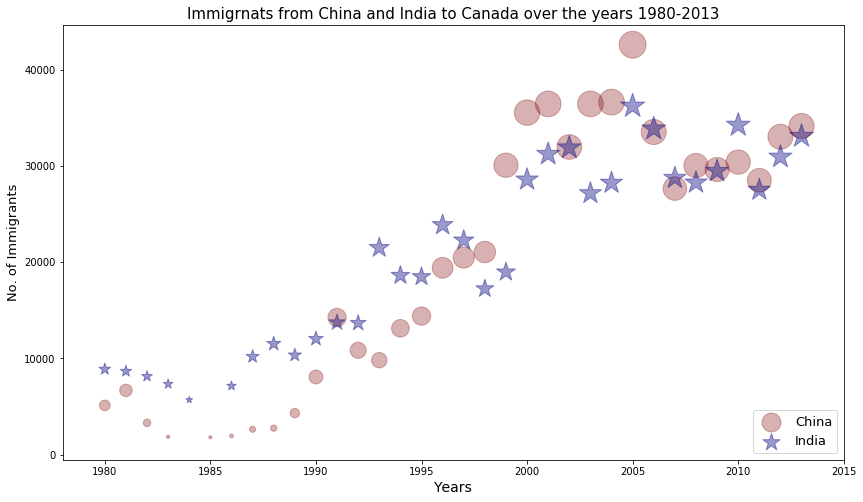

In [39]:
China_norm = (Canada_df_Chi_Ind['China'] - Canada_df_Chi_Ind['China'].min())/(Canada_df_Chi_Ind['China'] + Canada_df_Chi_Ind['China'].max())
India_norm = (Canada_df_Chi_Ind['India'] - Canada_df_Chi_Ind['India'].min())/(Canada_df_Chi_Ind['India'] + Canada_df_Chi_Ind['India'].max())

ax1 = Canada_df_Chi_Ind.plot(kind='scatter', 
                             figsize=(14,8),
                             x='Years', y='China', 
                             s = China_norm*1500, 
                             marker = 'o', color='maroon', 
                             alpha=0.3, xlim=(1978, 2015), label='China')
ax2 = Canada_df_Chi_Ind.plot(kind='scatter', x = 'Years', 
                             y='India', s=India_norm*1500, marker='*', 
                             color='navy', alpha=0.4, ax=ax1, xlim=(1978, 2015), label='India')
print ("Minimum immigrants from India: ", Canada_df_Chi_Ind['India'].min())
print ("Minimum immigrants from China ", Canada_df_Chi_Ind['China'].min())
ax1.set_ylabel("No. of Immigrants", fontsize=13)
ax1.set_xlabel("Years", fontsize=14)
ax2.legend(loc=4, fontsize=13)
ax1.legend(loc=4, fontsize=13)
ax1.set_title("Immigrnats from China and India to Canada over the years 1980-2013", fontsize=15)

In [41]:
print(type((Canada_df_Chi_Ind.loc[:,'India'].tolist())))
India_list = Canada_df_Chi_Ind.loc[:,'India'].tolist()

<class 'list'>


Minimum immigrants from India:  4211
Minimum immigrants from China  1527


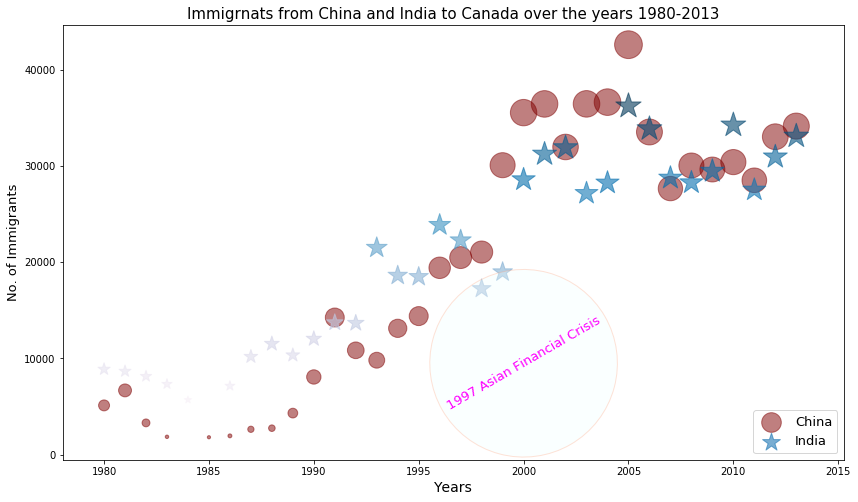

In [42]:
fig = plt.figure(figsize=(14,8))
plt.scatter(x=Canada_df_Chi_Ind['Years'], y=Canada_df_Chi_Ind['China'], 
         s = China_norm*1600, 
         marker = 'o', color='maroon', 
         alpha=0.5, label='China')
plt.scatter(x = Canada_df_Chi_Ind['Years'], 
                             y=Canada_df_Chi_Ind['India'], s=India_norm*1600, marker='*', c = India_list, 
                             cmap='PuBu', alpha=0.6, label='India')
print ("Minimum immigrants from India: ", Canada_df_Chi_Ind['India'].min())
print ("Minimum immigrants from China ", Canada_df_Chi_Ind['China'].min())
plt.ylabel("No. of Immigrants", fontsize=13)
plt.xlabel("Years", fontsize=14)
plt.legend(loc=4, fontsize=13)
plt.legend(loc=4, fontsize=13)
plt.title("Immigrnats from China and India to Canada over the years 1980-2013", fontsize=15)

bbox_props = dict(boxstyle="circle,pad=0.5", fc="azure", ec="lightsalmon", lw=1,alpha=0.3)
t = plt.text(2000, 9500, "1997 Asian Financial Crisis", ha="center", va="center", 
             rotation=30, bbox=bbox_props, fontsize=13, color='magenta')
bb = t.get_bbox_patch()
plt.savefig("Chi_In_to _Can_1980_2013.png", dpi=400)

### We can create a dataframe of top 6 countries based on total number of immigrants to Canada over the years. 

In [43]:
#print (Canada_df.head(3))
Canada_df_top6=Canada_df.sort_values(['Total_Immigrants'], axis=0, ascending=False).head(6)
#print (Canada_df_top6.head(3))
Canada_df_top6.drop(['Continent', 'Region'], axis=1, inplace=True)
#print (Canada_df_top6.head(3))
#print (Canada_df_top6.columns)
decade_1980 = list(map(str, range(1980, 1990)))
#print (decade_1980)
decade_1990 = list(map(str, range(1990, 2000)))
decade_2000 = list(map(str, range(2000, 2010)))
#Create dataframe based on these decades
Canada_df_top6_1980s = Canada_df_top6.loc[:, decade_1980].sum(axis=1)
#print (Canada_df_top6_1980s.head(3))
Canada_df_top6_1990s = Canada_df_top6.loc[:, decade_1990].sum(axis=1)
Canada_df_top6_2000s = Canada_df_top6.loc[:, decade_2000].sum(axis=1)
# create a new dataframe include the info from the decades
new_decades_df_top6 = pd.DataFrame({'1980s':Canada_df_top6_1980s, '1990s': Canada_df_top6_1990s, '2000s': Canada_df_top6_2000s})
print (new_decades_df_top6.head(3))

                                                     1980s   1990s   2000s
Country_Name                                                              
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413


#### let's plot the box plot

Text(0.5, 1.0, 'Box plot of Top 6 Immigrating Nations Over 3 Different Decades')

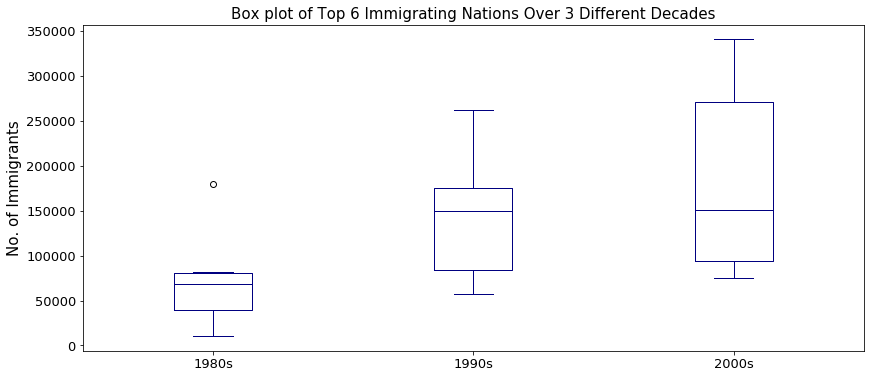

In [44]:
ax1 = new_decades_df_top6.plot(kind='box', figsize=(14,6), color='navy', fontsize=13)
ax1.set_ylabel("No. of Immigrants", fontsize=15)
ax1.set_title("Box plot of Top 6 Immigrating Nations Over 3 Different Decades", fontsize=15)

In [45]:
new_decades_df_top6.describe()

,1980s,1990s,2000s
count,6.00000,6.000000,6.000000
mean,73584.50000,144098.000000,183844.000000
std,58470.51749,76622.930111,113157.851524
min,10591.00000,56915.000000,75173.000000
25%,39193.25000,83597.000000,94459.250000
50%,68794.00000,150005.000000,150251.000000
75%,80821.50000,175678.250000,270919.250000
max,179171.00000,261966.000000,340385.000000


                                                     1980s   1990s   2000s
Country_Name                                                              
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413


Text(0.5, 1.0, 'Box plot of Top 10 Immigrating Nations Over 3 Different Decades')

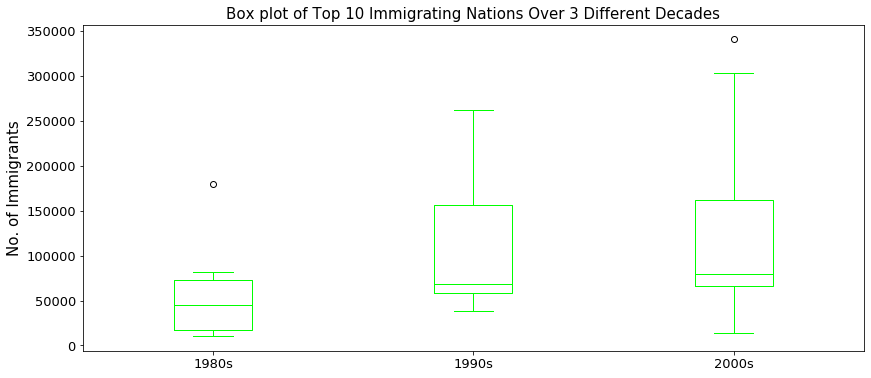

In [46]:
#print (Canada_df.head(3))
Canada_df_top10=Canada_df.sort_values(['Total_Immigrants'], axis=0, ascending=False).head(10)
#print (Canada_df_top6.head(3))
Canada_df_top10.drop(['Continent', 'Region'], axis=1, inplace=True)
#print (Canada_df_top6.head(3))
#print (Canada_df_top6.columns)
#Create dataframe based on these decades
Canada_df_top10_1980s = Canada_df_top10.loc[:, decade_1980].sum(axis=1)
#print (Canada_df_top6_1980s.head(3))
Canada_df_top10_1990s = Canada_df_top10.loc[:, decade_1990].sum(axis=1)
Canada_df_top10_2000s = Canada_df_top10.loc[:, decade_2000].sum(axis=1)
# create a new dataframe include the info from the decades
new_decades_df_top10 = pd.DataFrame({'1980s':Canada_df_top10_1980s, '1990s': Canada_df_top10_1990s, '2000s': Canada_df_top10_2000s})
print (new_decades_df_top10.head(3))
ax2 = new_decades_df_top10.plot(kind='box', figsize=(14,6), color='lime', fontsize=13)
ax2.set_ylabel("No. of Immigrants", fontsize=15)
ax2.set_title("Box plot of Top 10 Immigrating Nations Over 3 Different Decades", fontsize=15)

In [47]:
new_decades_df_top10.describe()

,1980s,1990s,2000s
count,10.000000,10.0000,10.000000
mean,55164.100000,109293.3000,130034.800000
std,51005.259272,73125.6123,110230.126938
min,10591.000000,38189.0000,13629.000000
25%,17563.500000,58902.2500,66391.250000
50%,44802.500000,67861.5000,79293.000000
75%,72809.000000,155766.5000,161577.500000
max,179171.000000,261966.0000,340385.000000


                                                     1980s   1990s   2000s
Country_Name                                                              
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413


Text(0.5, 1.0, 'Box plot of Top 15  Immigrating Nations Over 3 Different Decades')

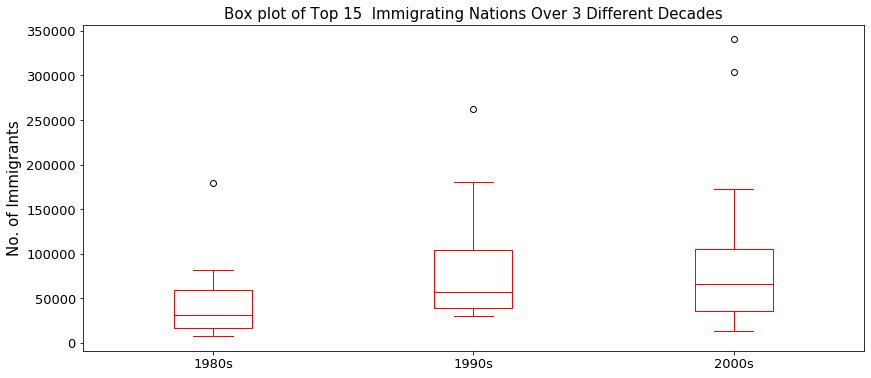

In [48]:
#print (Canada_df.head(3))
Canada_df_top15=Canada_df.sort_values(['Total_Immigrants'], axis=0, ascending=False).head(15)
#print (Canada_df_top6.head(3))
Canada_df_top15.drop(['Continent', 'Region'], axis=1, inplace=True)
#print (Canada_df_top6.head(3))
#print (Canada_df_top6.columns)
#Create dataframe based on these decades
Canada_df_top15_1980s = Canada_df_top15.loc[:, decade_1980].sum(axis=1)
#print (Canada_df_top6_1980s.head(3))
Canada_df_top15_1990s = Canada_df_top15.loc[:, decade_1990].sum(axis=1)
Canada_df_top15_2000s = Canada_df_top15.loc[:, decade_2000].sum(axis=1)
# create a new dataframe include the info from the decades
new_decades_df_top15 = pd.DataFrame({'1980s':Canada_df_top15_1980s, '1990s': Canada_df_top15_1990s, '2000s': Canada_df_top15_2000s})
print (new_decades_df_top15.head(3))
ax3=new_decades_df_top15.plot(kind='box', figsize=(14,6), fontsize=13, color='red')
ax3.set_ylabel("No. of Immigrants", fontsize=15)
ax3.set_title("Box plot of Top 15  Immigrating Nations Over 3 Different Decades", fontsize=15)

In [49]:
new_decades_df_top15.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


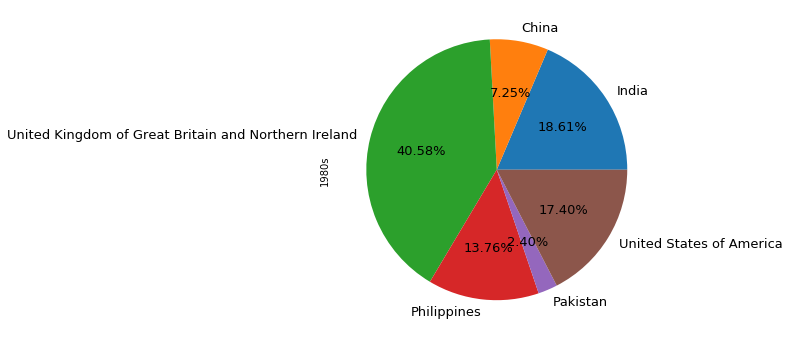

In [50]:
new_decades_df_top6['1980s'].plot(kind='pie', figsize=(14,6), autopct='%1.2f%%', fontsize=13)

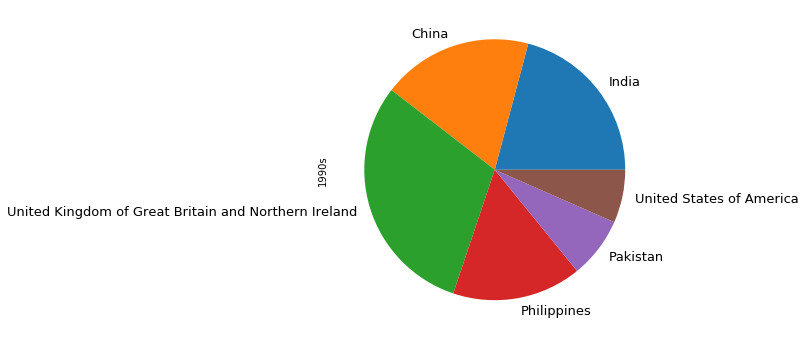

In [51]:
new_decades_df_top6['1990s'].plot(kind='pie', figsize=(14,6), fontsize=13)

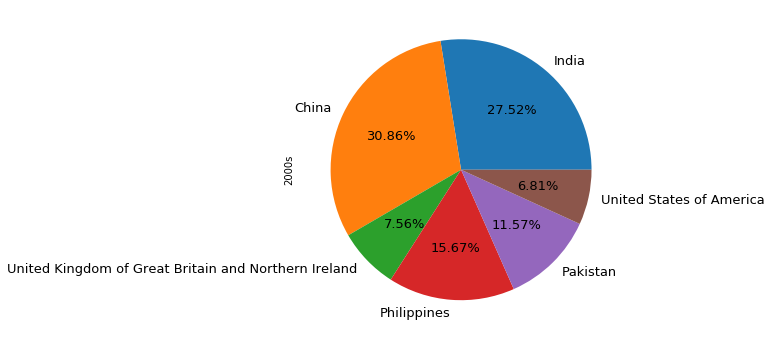

In [52]:
new_decades_df_top6['2000s'].plot(kind='pie', figsize=(14,6), autopct='%1.2f%%', fontsize=13)

## Use world Map with Folium Library. Folium creates leaflet of map that we will use here <br> for Chropleth map.  For other usage like clustering, check the original tutorial. 

In [447]:
import folium

#### Need to use a GeoJson file that describes the border of countries and the coordinates are given in <br> Latitude and Longitude. The GeoJson file was obtained from IBM tutorial. 

In [448]:
world_geo = r'world-countries.json'
# first create a world map with folium
world_map1 = folium.Map(location=[0,0], zoom_start=2, tiles = 'Mapbox Bright')
world_map1

In [449]:
world_geo = r'world-countries.json'
world_map1.choropleth(geo_data=world_geo,
                      data = Canada_df_world_map, 
                      columns=['Country_Name', '1985'],
                      key_on='feature.properties.name', 
                      fill_color='YlGn', fill_opacity=0.6, 
                      line_opacity=0.3, fontsize=12,
                      legend_name="Immigration to Canada in 1985")
#world_map1
world_map1.save('Immigration_to_Canada_W_MAP1985.html')
world_map1

In [450]:
world_map2 = folium.Map(location=[0,0], zoom_start=2, tiles = 'Mapbox Bright')
#world_map2
world_map2.choropleth(geo_data=world_geo,
                      data = Canada_df_world_map, 
                      columns=['Country_Name', '2005'],
                      key_on='feature.properties.name', 
                      fill_color='YlGn', fill_opacity=0.6, 
                      line_opacity=0.3, fontsize=12,
                      legend_name="Immigration to Canada in 2005")
#world_map1
world_map2.save('Immigration_to_Canada_W_MAP2005.html')
world_map2